# Week1 Optional (Required for Week8 and useful for 2nd Assignment)



## Forward Euler Method which you have studied in MATH1120 or MATH2310

## Using inhibited Function in sagemath

In [1]:
x,y=PolynomialRing(QQ,2,"Hamed").gens()
eulers_method(-3*y,0.0,1.0,0.1,0.600001)

         x                    y                  h*f(x,y)
0.000000000000000     1.00000000000000   -0.300000000000000
0.100000000000000    0.700000000000000   -0.210000000000000
0.200000000000000    0.490000000000000   -0.147000000000000
0.300000000000000    0.343000000000000   -0.102900000000000
0.400000000000000    0.240100000000000  -0.0720300000000000
0.500000000000000    0.168070000000000  -0.0504210000000000
0.600000000000000    0.117649000000000  -0.0352947000000000


# We can build our own function

In [2]:
x,y=PolynomialRing(QQ,2,"Hamed").gens()
f(x,y) = -3*y
def Euler(h,b):
    pts = []
    x = 0.0
    y = 1.0
    var('pt')
    pt = vector([x,y])
    pts.append(pt)
    for i in range(1, (int((b-x)/h)) + 2):
        kone = f(x,y)
        y = y + h*kone
        x = x + h
        pt=vector([x,y])
        pts.append(pt)
    pts1=[]
    pts2=[]
    for i in range(0,len(pts)):
        pts1.append(pts[i][0])
        pts2.append(pts[i][1])
    return pts1,pts2

In [3]:
Euler(0.1,0.6)

([0.000000000000000,
  0.100000000000000,
  0.200000000000000,
  0.300000000000000,
  0.400000000000000,
  0.500000000000000,
  0.600000000000000],
 [1.00000000000000,
  0.700000000000000,
  0.490000000000000,
  0.343000000000000,
  0.240100000000000,
  0.168070000000000,
  0.117649000000000])

In [4]:
Euler(0.2,0.6)

([0.000000000000000, 0.200000000000000, 0.400000000000000, 0.600000000000000],
 [1.00000000000000, 0.400000000000000, 0.160000000000000, 0.0640000000000000])

# Conclusion: We can see the global error in Euler method is O(h). So if $h$ gets finner twice the ratio $\frac{E_{0.2}}{E_{0.1}}=\frac{O((0.2))}{O((0.1))}=\frac{C_{2}(0.2)}{C_{1}(0.1)}\approx 2$ 

## In next cells, we analyse the local error

In [5]:
x=var('x')
y=function('y')(x)
De=diff(y,x)-(-3*y)
desolve(De,[y,x],[0,1])

e^(-3*x)

In [6]:
Analytic_Solution(x)=exp(-3*x)

In [7]:
Analytic_Solution(0.6)

0.165298888221587

In [8]:
First_Error=abs(Analytic_Solution(0.6)-0.0640000000000000)
print("Error with h=0.2 is ", First_Error)

Error with h=0.2 is  0.101298888221587


In [9]:
Second_Error=abs(Analytic_Solution(0.6)-0.117649000000000)
print("Error with h=0.1 is ",Second_Error)

Error with h=0.1 is  0.0476498882215866


In [10]:
print(First_Error/Second_Error)

2.12589980800198


# We can see the local error is O(h^2). So if $h$ gets finner 10 times the ratio $\frac{E_{0.2}}{E_{0.1}}=\frac{O((0.2)^2)}{O((0.1)^2)}=\frac{C_{2}(0.2)^2}{C_{1}(0.1)^2}\approx 4$ 

In [11]:
def New_Simple_Euler(xin,yin,h,xtar):
    n=int((xtar-xin)/h)
    for i in range (n):
        ytar=yin-3*yin*h
        yin=ytar
        xin=xin+h
    return ytar

In [12]:
New_Simple_Euler(0,1,0.1,0.1)

0.700000000000000

In [13]:
First_Error=abs(Analytic_Solution(0.2)-New_Simple_Euler(0,1,0.2,0.2))
print(First_Error)

0.148811636094026


In [14]:
Second_Error=abs(Analytic_Solution(0.1)-New_Simple_Euler(0,1,0.1,0.1))
print(Second_Error)

0.0408182206817179


In [15]:
print(First_Error/Second_Error)

3.64571589865204


In [16]:
Third_Error=abs(Analytic_Solution(0.01)-New_Simple_Euler(0,1,0.01,0.01))
print(Third_Error)

0.000445533548508181


In [17]:
print(Second_Error/Third_Error)

91.6164917734997


In [18]:
Fourth_Error=abs(Analytic_Solution(0.001)-New_Simple_Euler(0,1,0.001,0.001))
print(Fourth_Error)

4.49550337300320e-6


In [19]:
print(Third_Error/Fourth_Error)

99.1064874255772


# From Week9, we can see that for the example $y'=-3y$ we must have $h<\frac{-2}{	\lambda}=\frac{2}{3}$ to get convergence in numerical method (Euler) for ODE. Here we try this with $h=0.7>\frac{2}{3}$ and $h=0.2<\frac{2}{3}$. 

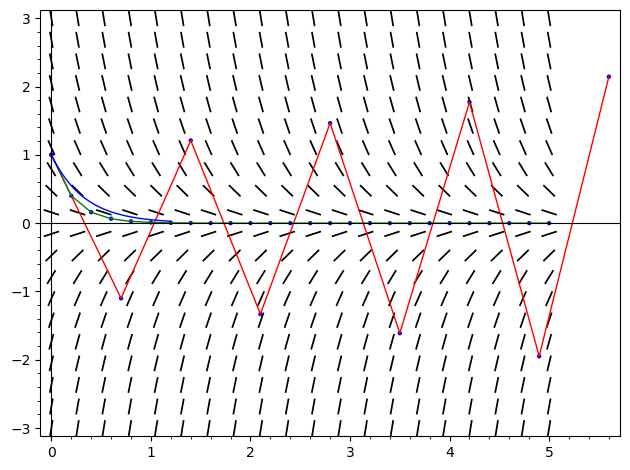

In [20]:
# Here we test with plotting.
x,y=PolynomialRing(QQ,2,"Hamed").gens()
firstode=eulers_method(-3*y,0,1,.7,4.9,algorithm="none")
P1=list_plot(firstode)
P2=line(firstode,color='red')
secondode=eulers_method(-3*y,0,1,.2,4.9,algorithm="none")
P3=list_plot(secondode)
P4=line(secondode,color='green')
T=plot(e^(-3*x),[0,1.2])
f(x,y) = -3*y
W=plot_slope_field(f(x,y),(x,0,5),(y,-3,3))
show(P1+P2+P3+P4+T+W)

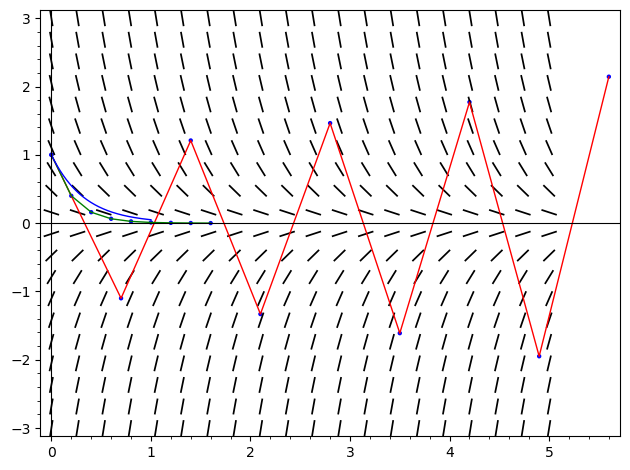

In [21]:
T=Euler(0.7,5.6)
r = [(T[0][i],T[1][i]) for i in range(0,9)]
P1=list_plot(r, color='blue')
P2=list_plot(r, color='red',plotjoined=True)

T=Euler(.2,1.6)
r = [(T[0][i],T[1][i]) for i in range(0,9)]
P3=list_plot(r, color='blue')
P4=list_plot(r, color='green',plotjoined=True)

x=var('x')
y=function('y')(x)
De=diff(y,x)-(-3*y)
T=plot(desolve(De,[y,x],[0,1]),[0,1])

f(x,y) = -3*y
W=plot_slope_field(f(x,y),(x,0,5),(y,-3,3))
show(P1+P2+P3+P4+T+W)


# Backward Euler Method

In [22]:
x,y=PolynomialRing(QQ,2,"Hamed").gens()
f(x,y) = -3*y
def Backward_Euler(h,b):
    pts = []
    x = 0.0
    y = 1.0
    var('pt')
    pt = vector([x,y])
    pts.append(pt)
    for i in range(1, (int((b-x)/h)) + 2):
        koneback = 1/(1+3*h)
        y = y*koneback
        x = x + h
        pt=vector([x,y])
        pts.append(pt)
    pts1=[]
    pts2=[]
    for i in range(0,len(pts)):
        pts1.append(pts[i][0])
        pts2.append(pts[i][1])
    return pts1,pts2

In [23]:
Backward_Euler(0.1,0.6)

([0.000000000000000,
  0.100000000000000,
  0.200000000000000,
  0.300000000000000,
  0.400000000000000,
  0.500000000000000,
  0.600000000000000],
 [1.00000000000000,
  0.769230769230769,
  0.591715976331361,
  0.455166135639508,
  0.350127796645776,
  0.269329074342904,
  0.207176211033003])

# We can see that for the example $y'=-3y$ for any $h>0$ the backward Euler works. Here we try this with $h=0.7$ and $h=0.2$. 

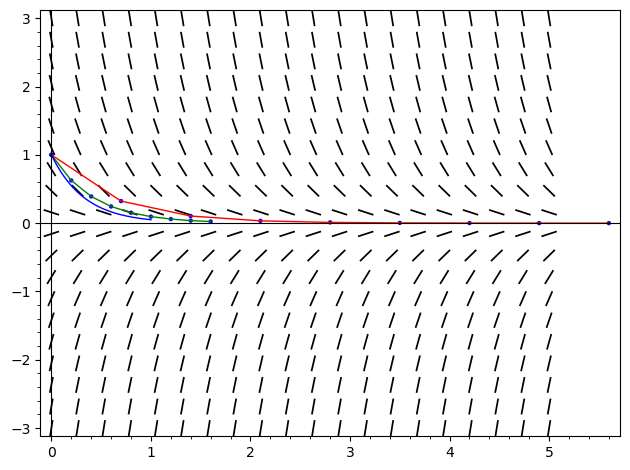

In [24]:
T=Backward_Euler(0.7,5.6)
r = [(T[0][i],T[1][i]) for i in range(0,9)]
P1=list_plot(r, color='blue')
P2=list_plot(r, color='red',plotjoined=True)

T=Backward_Euler(.2,1.6)
r = [(T[0][i],T[1][i]) for i in range(0,9)]
P3=list_plot(r, color='blue')
P4=list_plot(r, color='green',plotjoined=True)

x=var('x')
y=function('y')(x)
De=diff(y,x)-(-3*y)
T=plot(desolve(De,[y,x],[0,1]),[0,1])

f(x,y) = -3*y
W=plot_slope_field(f(x,y),(x,0,5),(y,-3,3))
show(P1+P2+P3+P4+T+W)